# Desaparecidos en México por edad

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('report_12_01_2018_2.csv')

In [3]:
df['fuerocomun_edad'] = pd.to_numeric(df['fuerocomun_edad'], errors='signed')
is_feamale = df['fuerocomun_sexo'] == 'MUJER'
is_male = df['fuerocomun_sexo'] == 'HOMBRE'

In [4]:
def group_age(data):

    d = {
        'baby': 0,
        'child': 0,
        'teen': 0,
        'adult': 0,
        'adult2': 0,
        'old': 0 
    }

    for key_val in data.iteritems():
        age = key_val[0]
        value = key_val[1]

        if age < 1:
            d['baby'] += value
        
        if age > 1 and age < 10:
            d['child'] += value
        
        if age > 9 and age < 19:
            d['teen'] += value

        if age > 18 and age <= 30:
            d['adult'] += value
        
        if age > 30 and age <= 45:
            d['adult2'] += value

        if age > 45:
            d['old'] += value
    values = []
    for e in d:
        values.append(d[e])

    return values


In [5]:
female_fuerocomun_edad = df[is_feamale]['fuerocomun_edad'].value_counts()
male_fuerocomun_edad = df[is_male]['fuerocomun_edad'].value_counts()
female_data = group_age(female_fuerocomun_edad)
male_data = group_age(male_fuerocomun_edad)


label = []
label.append("Niños\n1<")
label.append("Niños\n>1 y <=9")
label.append("Jóvenes\n>9 y <=18")
label.append("Jóven Adulto\n>18 y <=30")
label.append("Adulto\n>30 y <=45 ")
label.append("Adulto Mayor\n>45")


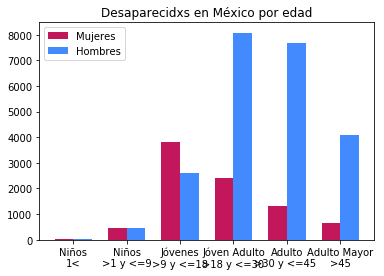

In [8]:
N = len(label)
men_std = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, female_data, width, color='#C2185B')

women_std = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, male_data, width, color='#448AFF')

# add some text for labels, title and axes ticks
ax.set_title('Desaparecidxs en México por edad')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(label)

ax.legend((rects1, rects2), ('Mujeres', 'Hombres'))

plt.show()